In [1]:
import re
import json
import numpy as np


import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',500)
pd.set_option('max_colwidth',500)

In [2]:
df_archive= pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [6]:
df_image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [7]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
df_tweet = pd.read_json('tweet_json.txt', lines = True)

In [9]:
df_tweet.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'res...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indi...",NaN,NaN,None,NaN,False,8853,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 14...","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, '...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com',

# DATA ASSESSMENT

In [10]:
#sample of df_archive
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1097,736225175608430592,NaN,NaN,2016-05-27 15:58:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please stop sending in non-canines like this Alaskan Flop Turtle. This is very frustrating. 10/10 https://t.co/qXteK6Atxc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736225175608430592/photo/1,10,10,very,None,None,None,None
1365,702684942141153280,NaN,NaN,2016-02-25 02:42:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lucy. She's sick of these bullshit generalizations 11/10 https://t.co/d2b5C2R0aO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/702684942141153280/photo/1,11,10,Lucy,None,None,None,None
51,882268110199369728,NaN,NaN,2017-07-04 16:01:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Alfy. You're witnessing his first watermelon experience. I think it was a success. 13/10 happy 4th Alfy 🇺🇸 https://t.co/fYP5RlutfA,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/882268110199369728/photo/1,https://twitter.com/dog_rates/status/882268110199369728/photo/1,https://twitter.com/dog_rates/status/882268110199369728/photo/1",13,10,Alfy,None,None,None,None
162,860524505164394496,NaN,NaN,2017-05-05 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Carl. He likes to dance. Doesn't care what you think about it. 13/10 h*ckin confident pup https://t.co/C2zHcNIu4I,NaN,NaN,NaN,https://twitter.com/dog_rates/status/860524505164394496/photo/1,13,10,Carl,None,None,None,None
239,846874817362120707,NaN,NaN,2017-03-29 00:01:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tuck. As you can see, he's rather h*ckin rare. Taken seriously until his legs are seen. Tail stuck in a permanent zoom. 13/10 https://t.co/P7PBGqrKSe",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/846874817362120707/photo/1,https://twitter.com/dog_rates/status/846874817362120707/photo/1",13,10,Tuck,None,None,None,None


In [11]:
#information of df_archive
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
df_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [13]:
#assessing the number of retweets
df_archive.retweeted_status_user_id.count()

181

In [14]:
sum(df_archive.duplicated('tweet_id'))

0

In [15]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
#assessing tweet.json file
df_tweet.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
798,2016-09-05 15:58:34+00:00,772826264096874500,772826264096874496,Meet Roosevelt. He's preparing for takeoff. Make sure tray tables are in their full pupright &amp; licked position\n11/10 https://t.co/7CQkn3gHOQ,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 772826251237199873, 'id_str': '772826251237199873', 'indices': [121, 144], 'media_url': 'http://pbs.twimg.com/media/CrmhYYIXEAEcyYY.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CrmhYYIXEAEcyYY.jpg', 'url': 'https://t.co/7CQkn3gHOQ', 'display_url': 'pic.twitter.com/7CQkn3gHOQ', 'expanded_url': 'https://twitter.com/dog_rates/status/772826264096874500/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 10...","{'media': [{'id': 772826251237199873, 'id_str': '772826251237199873', 'indices': [121, 144], 'media_url': 'http://pbs.twimg.com/media/CrmhYYIXEAEcyYY.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CrmhYYIXEAEcyYY.jpg', 'url': 'https://t.co/7CQkn3gHOQ', 'display_url': 'pic.twitter.com/7CQkn3gHOQ', 'expanded_url': 'https://twitter.com/dog_rates/status/772826264096874500/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1024, 'h': 576, 'resize': 'fit'}, 'medium': {'w': 1024, 'h': 576, ...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indi...",NaN,NaN,None,NaN,False,2669,8842,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
651,2016-10-29 15:55:58+00:00,792394556390137856,792394556390137856,Meet BeBe. She rocks the messy bun of your dreams. H*ckin flawless. 12/10 would watch her tutorial https://t.co/of0pFNBIl8,False,"[0, 98]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 792394534248386560, 'id_str': '792394534248386560', 'indices': [99, 122], 'media_url': 'http://pbs.twimg.com/media/Cv8moW_WEAAD_Xg.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Cv8moW_WEAAD_Xg.jpg', 'url': 'https://t.co/of0pFNBIl8', 'display_url': 'pic.twitter.com/of0pFNBIl8', 'expanded_url': 'https://twitter.com/dog_rates/status/792394556390137856/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 680...","{'media': [{'id': 792394534248386560, 'id_str': '792394534248386560', 'indices': [99, 122], 'media_url': 'http://pbs.twimg.com/media/Cv8moW_WEAAD_Xg.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Cv8moW_WEAAD_Xg.jpg', 'url': 'https://t.co/of0pFNBIl8', 'display_url': 'pic.twitter.com/of0pFNBIl8', 'expanded_url': 'https://twitter.com/dog_rates/status/792394556390137856/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 680, 'h': 680, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'res...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'u

In [17]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [18]:
df_tweet = df_tweet.rename(columns = {'id':'tweet_id'})

In [19]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [20]:
#assessing df_image_predictions
df_image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
844,695074328191332352,https://pbs.twimg.com/media/CaVmajOWYAA1uNG.jpg,1,Shih-Tzu,0.510106,True,Tibetan_terrier,0.071981,True,Lhasa,0.069231,True
1242,747204161125646336,https://pbs.twimg.com/media/Cl6aOBhWEAALuti.jpg,2,coil,0.533699,False,dugong,0.087959,False,rain_barrel,0.039221,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
56,667065535570550784,https://pbs.twimg.com/media/CUHkkJpXIAA2w3n.jpg,1,jigsaw_puzzle,0.560001,False,doormat,0.103259,False,space_heater,0.042568,False
2009,878281511006478336,https://pbs.twimg.com/media/DDBIX9QVYAAohGa.jpg,1,basset,0.320420,True,collie,0.215975,True,Appenzeller,0.128507,True


In [21]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
#assessing duplicates in predictions df
sum(df_image_predictions.duplicated())

0

In [23]:
#assessing duplicates in tweet_id
sum(df_image_predictions.duplicated('tweet_id'))

0

In [24]:
#assessing duplicates in jpg
sum(df_image_predictions.duplicated('jpg_url'))

66

In [25]:
#checking the duplicated jpgs
jpg_duplicates = df_image_predictions[df_image_predictions.duplicated('jpg_url')]

In [26]:
jpg_duplicates

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


# ASSESMENT SUMMARY

**TIDINESS ISSUES:
1. df_archive:The doggo, floofer, Puppo, and pupper columns should be merged should be one observational unit.
2. df_archive:The Text column contains the ratings and URL which are in other observational unit.
3. df_image_predictions:The Jpg-URL would be removed from this data frame and added to the df_archive data.

**QUALITY ISSUES:
1. df_archive:The timestamp column is in float 64 not datetime.
2. df_archive:Some dog names are inputted as ‘a’ will be put as Not named.
3. df_image_predictions:p1,p2, and p3 columns have irregular values as letter casings would be put into lower casings.
4. df_image_predictions:Duplicated jpg_urls are present and will be removed.
5. df_archive:Doggo, floofer, Puppo, and pupper are not in categorical datatypes.
6. df_archive:Removing the created _at column since we have the timestamp column
7. df_image_predictionsSome images are not of dogs in the predictions column, they will be removed.
8. df_archive:None values are present in doggo,floofer, Puppo and pupper columns, will be removed and the individual columns dropped after merging.
9. df_archive:None are present in name column. This will be changed to Nan.
10. df_archive: The ratings are not in float data types.

                      


# DATA CLEANING

In [27]:
#making copies of the files before cleaning
df_archive_clean = df_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweet_clean = df_tweet.copy()

In [28]:
df_archive_clean = df_archive_clean[df_archive_clean['retweeted_status_id'].isnull()]

**DEFINE

**removing the retweets from the data to remain the ordinary tweets

In [29]:

df_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

**TEST

In [30]:
df_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


**DEFINE

Removing None from the dog types column

**CODE

In [31]:
types = ['doggo','floofer','pupper','puppo']
for type in types:
       df_archive_clean[type] = df_archive_clean[type].replace('None', '')


**TEST

In [32]:
df_archive_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,,,,


**DEFINE

**Merge 'doggo','floofer','pupper','puppo' column to form one column

**CODE

In [33]:
df_archive_clean['dog_stages'] = df_archive_clean['doggo']+','+df_archive_clean['floofer']+df_archive_clean['pupper']+df_archive_clean['puppo']

**TEST

In [34]:
df_archive_clean.dog_stages.value_counts()

,                1831
,pupper           224
doggo,             75
,puppo             24
doggo,pupper       10
,floofer            9
doggo,puppo         1
doggo,floofer       1
Name: dog_stages, dtype: int64

**DEFINE

**dropping the 'doggo','floofer','pupper','puppo' column

In [35]:
df_archive_clean= df_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

**TEST

In [36]:
df_archive_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
1571,687704180304273409,NaN,NaN,2016-01-14 18:33:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Blakely. He thinks that's a hat. Silly pupper. That's a nanner. 9/10 https://t.co/UwOV1jqKRt,https://twitter.com/dog_rates/status/687704180304273409/photo/1,9,10,Blakely,",pupper"
510,812372279581671427,NaN,NaN,2016-12-23 19:00:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Moe. He's a fetty woof. Got a cardboard cutout of himself for Christmas. 13/10 inspirational af https://t.co/gCnAeL2mvT,"https://twitter.com/dog_rates/status/812372279581671427/photo/1,https://twitter.com/dog_rates/status/812372279581671427/photo/1",13,10,Moe,","
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",https://twitter.com/dog_rates/status/863079547188785154/photo/1,14,10,None,","
668,790277117346975746,NaN,NaN,2016-10-23 19:42:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bruce. He never backs down from a challenge. 11/10 you got this Bruce https://t.co/aI7umZHIq7,https://twitter.com/dog_rates/status/790277117346975746/photo/1,11,10,Bruce,","
2017,672160042234327040,NaN,NaN,2015-12-02 21:06:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bubba. He's a Titted Peebles Aorta. Evolutionary masterpiece. Comfortable with his body. 8/10 great pupper https://t.co/aNkkl5nH3W,https://twitter.com/dog_rates/status/672160042234327040/photo/1,8,10,Bubba,",pupper"
907,757741869644341248,NaN,NaN,2016-07-26 00:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Leonard. He hides in bushes to escape his problems. 10/10 relatable af https://t.co/TdyGTcX0uo,"https://twitter.com/dog_rates/status/757741869644341248/photo/1,https://twitter.com/dog_rates/status/757741869644341248/photo/1",10,10,Leonard,","
1235,712668654853337088,NaN,NaN,2016-03-23 15:53:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Sunny and Roxy. They pull things out of water together. 10/10 for both https://t.co/88aedAmxcl,"https://twitter.com/dog_rates/status/712668654853337088/photo/1,https://twitter.com/dog_rates/status/712668654853337088/photo/1,https://twitter.com/dog_rates/status/712668654853337088/photo/1",10,10,Sunny,","
1217,714962719905021952,NaN,NaN,2016-03-29 23:49:30 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Just in case anyone's having a bad day. 12/10 would bounce with https://t.co/T9sgP9ttnQ,https://vine.co/v/inVtemLt9tE,12,10,None,","
791,773704687002451968,NaN,NaN,2016-09-08 02:09:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Loki. He knows he's adorable. One ear always pupared. 12/10 would snug in depicted fashion forever https://t.co/OqNggd4Oio,"https://twitter.com/dog_rates/status/773704687002451968/photo/1,https://twitter.com/dog_rates/status/773704687002451968/photo/1",12,10,Loki,","
1419,698342080612007937,NaN,NaN,2016-02-13 03:05:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Maximus. He's training for the tetherball world championship. The grind never stops. 11/10 (vid by @Amuly21) https://t.co/VmFfWMjNkp,https://twitter.com/dog_rates/status/698342080612007937/video/1,11,10,Maximus,","


In [37]:
archive_original_tweet= df_archive_clean['tweet_id']

**DEFINE

**removing duplicate jpg in predictions

In [38]:
df_image_predictions_clean = df_image_predictions_clean.drop_duplicates('jpg_url')

**TEST

In [39]:
sum(df_image_predictions_clean['jpg_url'].duplicated())

0

**DEFINE

change timestamp to datetime AND changing dog stage to categorical

**CODE

In [40]:
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)

**CODE

In [41]:
df_archive_clean.dog_stages = df_archive_clean.dog_stages.astype('category')

**TEST

In [42]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  dog_stages             2175 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int6

**DEFINE
drop expanded_url from the df_archive_clean and moving jpg url from df_image_predictions_clean

**CODE

In [43]:
df_archive_clean.drop('expanded_urls',axis=1, inplace=True)

**TEST

In [44]:
df_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stages'],
      dtype='object')

**DEFINE
moving jpg url from df_image_predictions_clean to df_archive_clean

**CODE

In [45]:
df_archive_clean = df_archive_clean.assign(jpg_url = df_image_predictions_clean.pop('jpg_url'))

**TEST

In [46]:
df_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stages', 'jpg_url'],
      dtype='object')

**DEFINE
removing images that are not dogs from df_image_predictions_clean

**CODE

In [47]:
df_image_predictions_clean = df_image_predictions_clean.query('p1_dog==True | p2_dog==True | p3_dog==True')

**TEST

In [48]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1691 non-null   int64  
 1   img_num   1691 non-null   int64  
 2   p1        1691 non-null   object 
 3   p1_conf   1691 non-null   float64
 4   p1_dog    1691 non-null   bool   
 5   p2        1691 non-null   object 
 6   p2_conf   1691 non-null   float64
 7   p2_dog    1691 non-null   bool   
 8   p3        1691 non-null   object 
 9   p3_conf   1691 non-null   float64
 10  p3_dog    1691 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(3)
memory usage: 123.9+ KB


**DEFINE
#changing values in p1, p2, p3 to lower case letters.

**CODE

In [49]:
df_image_predictions_clean = df_image_predictions_clean.apply(lambda x:x.str.lower() if x.dtype == "object" else x)

**TEST

In [50]:
df_image_predictions_clean.head()

,tweet_id,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


In [51]:
#Replacing all invalid names with Nan
df_archive_clean.loc[df_archive_clean['name'].str.islower(), 'name'] = np.nan

In [52]:
# replace all 'None' names with NaN
df_archive_clean.loc[df_archive_clean['name']=='None', 'name'] = np.nan

In [53]:
df_archive_clean.name.value_counts()

Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
              ..
Shiloh         1
Gustav         1
Arlen          1
Lenox          1
Christoper     1
Name: name, Length: 930, dtype: int64

**Define
Removing the created_at column 

**CODE

In [54]:
df_tweet_clean.drop('created_at', axis = 1, inplace =True)

**TEST

In [55]:
df_tweet_clean.columns

Index(['tweet_id', 'id_str', 'full_text', 'truncated', 'display_text_range',
       'entities', 'extended_entities', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status'],
      dtype='object')

**DEFINE


**Remove irrelevant columns 'in_reply_to_status_id' and 'in_reply_to_user_id'

**CODE

In [56]:
df_archive_clean.drop('in_reply_to_status_id', axis=1,inplace=True)
df_archive_clean.drop('in_reply_to_user_id', axis=1,inplace=True)

**TEST

In [57]:
df_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,",",https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,",",https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,",",https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,",",https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,",",https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg


**DEFINE
Changing the ratings column to type float


**CODE

In [78]:
df_archive_clean.rating_numerator = df_archive_clean.rating_numerator.astype('float64')
df_archive_clean.rating_denominator = df_archive_clean.rating_denominator.astype('float64')

**TEST

In [79]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   float64            
 6   name                1391 non-null   object             
 7   dog_stages          2175 non-null   category           
 8   jpg_url             1830 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(1), object(4)
memory usage: 155.4+ KB


**DEFINE
#Removing the rating and link from the text column using regex

**CODE

In [58]:
#Removing the rating from the text column using regex
fraction_regex =r"(\d+)/(\d+)"
df_archive_clean['text'] = df_archive_clean['text'].str.replace(fraction_regex,"")

C:\Users\oluwa\AppData\Local\Temp\ipykernel_41628\1524735440.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_archive_clean['text'] = df_archive_clean['text'].str.replace(fraction_regex,"")


In [59]:
#Removing decimal ratings from the text column using regex
fraction_regex =r"(\d+\.\d*\/\d+)"
df_archive_clean['text'] = df_archive_clean['text'].str.replace(fraction_regex,"")

C:\Users\oluwa\AppData\Local\Temp\ipykernel_41628\3507790304.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_archive_clean['text'] = df_archive_clean['text'].str.replace(fraction_regex,"")


In [60]:
#Removing the link from the text column using regex
link_regex = r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})"
df_archive_clean['text'] = df_archive_clean['text'].str.replace(link_regex,"")

C:\Users\oluwa\AppData\Local\Temp\ipykernel_41628\2580957186.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_archive_clean['text'] = df_archive_clean['text'].str.replace(link_regex,"")


**TEST

In [61]:
df_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.,13,10,Phineas,",",https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit.",13,10,Tilly,",",https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.,12,10,Archie,",",https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. happens to the best of us,13,10,Darla,",",https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. #BarkWeek",12,10,Franklin,",",https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg


In [62]:
df_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.,13,10,Phineas,",",https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit.",13,10,Tilly,",",https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.,12,10,Archie,",",https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. happens to the best of us,13,10,Darla,",",https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. #BarkWeek",12,10,Franklin,",",https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg


In [63]:
#Saving the cleaned datasets to csv
df_archive_clean.to_csv("df_archive_clean.csv", index=False)
df_image_predictions_clean.to_csv("df_image_predictions_clean.csv", index=False)
df_tweet_clean.to_csv("df_clean_tweet.csv", index=False)

**Merging the dataframes

In [64]:
df_archive_image_dataframes = df_archive_clean.merge(df_image_predictions_clean, on='tweet_id', how='left')
master_dataframe = df_archive_image_dataframes.merge(df_tweet_clean, on ='tweet_id', how= 'left')


In [65]:
master_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2175 non-null   int64              
 1   timestamp                      2175 non-null   datetime64[ns, UTC]
 2   source_x                       2175 non-null   object             
 3   text                           2175 non-null   object             
 4   rating_numerator               2175 non-null   int64              
 5   rating_denominator             2175 non-null   int64              
 6   name                           1391 non-null   object             
 7   dog_stages                     2175 non-null   category           
 8   jpg_url                        1830 non-null   object             
 9   img_num                        1686 non-null   float64            
 10  p1                      

**Saving master dataframe to csv

In [66]:
master_dataframe.to_csv("twitter_archive_master.csv", index=False)

# DATA VISUALIZATION AND ANALYSIS

In [67]:
master_dataframe.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.175000e+03,2175.000000,2175.000000,1686.000000,1686.000000,1686.000000,1.686000e+03,2.175000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2175.000000,2175.000000,2117.0,2117.0,2.800000e+01,2.800000e+01
mean,7.371205e+17,13.215172,10.492874,1.215896,0.605150,0.137147,6.135847e-02,7.371205e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,2757.987126,8746.022989,0.0,0.0,8.137762e+17,8.137762e+17
std,6.748668e+16,47.725696,7.019084,0.576191,0.266416,0.101252,5.188051e-02,6.748668e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,4646.599662,12052.503836,0.0,0.0,6.126669e+16,6.126669e+16
min,6.660209e+17,0.000000,0.000000,1.000000,0.044333,0.000010,2.160900e-07,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,52.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.768432e+17,10.000000,10.000000,1.000000,0.378746,0.054938,1.598680e-02,6.768432e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,608.000000,1911.500000,0.0,0.0,7.845901e+17,7.845901e+17
50%,7.098528e+17,11.000000,10.000000,1.000000,0.606701,0.121432,4.995100e-02,7.098528e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1341.000000,4042.000000,0.0,0.0,8.331775e+17,8.331775e+17
75%,7.894226e+17,12.000000,10.000000,1.000000,0.851579,0.198428,9.468462e-02,7.894226e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3220.000000,11107.000000,0.0,0.0,8.585077e+17,8.585077e+17
max,8.924206e+17,1776.000000,170.000000,4.000000,0.999984,0.467678,2.734190e-01,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.855174e+17,8.855174e+17


In [68]:
#1st Insight- The top 10 most common dog names
top_10_names = pd.DataFrame(master_dataframe['name'].value_counts()[1:11]).reset_index()
top_10_names.columns = ['names', 'count']
top_10_names

,names,count
0,Lucy,11
1,Cooper,10
2,Oliver,10
3,Penny,9
4,Tucker,9
5,Sadie,8
6,Lola,8
7,Winston,8
8,Toby,7
9,Daisy,7


Text(0.5, 1.0, 'top 10 names')

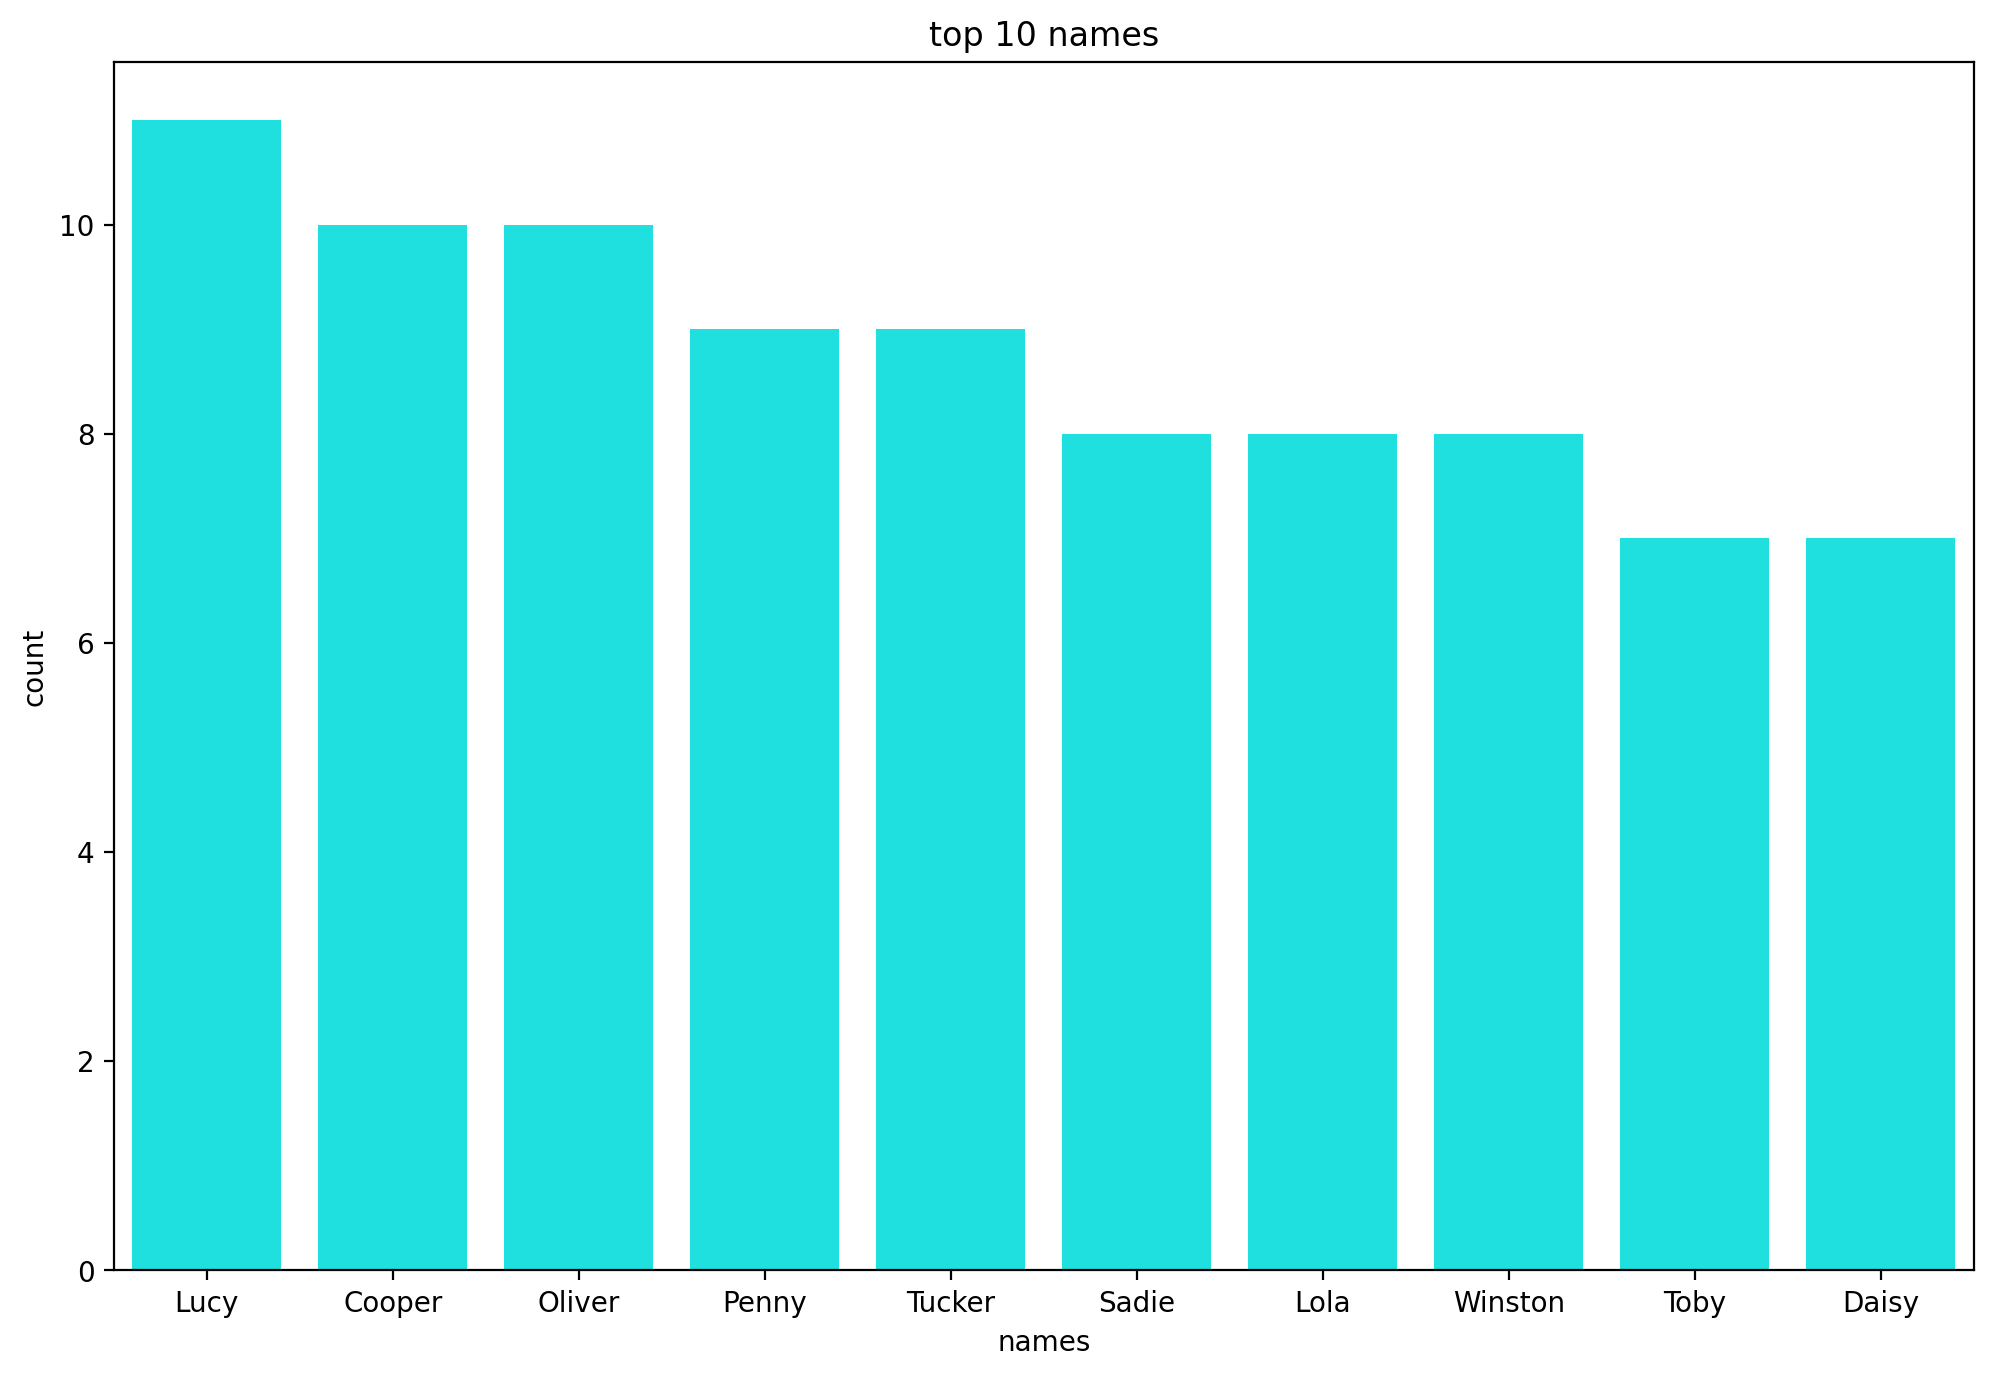

In [69]:
fig, axes = plt.subplots(1,1, figsize=(12,8), dpi=200)

sns.barplot(data=top_10_names, x='names', y='count', color='cyan', ax=axes)

axes.set_title('top 10 names')

In [70]:
#2nd Insight identifying the outliers in the rating numerator column
Q1 = master_dataframe['rating_numerator'].quantile(0.25)
Q3 = master_dataframe['rating_numerator'].quantile(0.75)
IQR = Q3 - Q1
outliers_mask = ~master_dataframe['rating_numerator'].between(Q1 - 1.5*IQR, Q3 + 1.5*IQR)
master_dataframe[outliers_mask]



,tweet_id,timestamp,source_x,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id_str,full_text,truncated,display_text_range,entities,extended_entities,source_y,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
42,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.",5,10,Bella,",",https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1.0,golden_retriever,0.943082,True,labrador_retriever,0.032409,True,kuvasz,0.005501,True,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",False,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 883482838036860928, 'id_str': '883482838036860928', 'indices': [113, 136], 'media_url': 'http://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg', 'url': 'https://t.co/qjrljjt948', 'display_url': 'pic.twitter.com/qjrljjt948', 'expanded_url': 'https://twitter.com/dog_rates/status/883482846933004288/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 1...","{'media': [{'id': 883482838036860928, 'id_str': '883482838036860928', 'indices': [113, 136], 'media_url': 'http://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg', 'url': 'https://t.co/qjrljjt948', 'display_url': 'pic.twitter.com/qjrljjt948', 'expanded_url': 'https://twitter.com/dog_rates/status/883482846933004288/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 1006, 'h': 1200, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, ...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indi...",NaN,NaN,None,NaN,False,10407,46860,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
52,881633300179243008,2017-07-02 21:58:53+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but is an emotional impulse rating. More like s,17,10,NaN,",",https://pbs.twimg.com/media/CUHhgvHUAAA4aB0.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,False,"[13, 91]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'roushfenway', 'name': 'Roush Fenway Racing', 'id': 47384430, 'id_str': '47384430', 'indices': [0, 12]}], 'urls': []}",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",8.816070e+17,8.816070e+17,47384430.0,47384430.0,roushfenway,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {

**Calculating the Correlation between retweet_count and favorite_count

In [71]:
correlation = master_dataframe['retweet_count'].corr(master_dataframe['favorite_count'])
print(correlation)

0.9117316533564106


<AxesSubplot:xlabel='retweet_count', ylabel='favorite_count'>

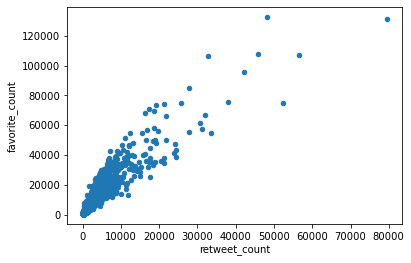

In [72]:
master_dataframe.plot.scatter(x='retweet_count', y='favorite_count')

In [73]:
plt.savefig('output.png', dpi=200)

<Figure size 432x288 with 0 Axes>